<center><h1>SPE Ec Workshop Day 3: <b>CLASSIFICATION MODELS<b>

#1. Import Libraries

In [2]:
from google.colab import output
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#2. Load Data

In [3]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zcEd9C8inASc9NDCcWttwWio14HDqhKC' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1zcEd9C8inASc9NDCcWttwWio14HDqhKC" -O train.csv && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1qolBRzkeXShDwMbxqnOJUDOOTuiXJKP8' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1qolBRzkeXShDwMbxqnOJUDOOTuiXJKP8" -O test.csv && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1kZi1tu8Z8_aJWScZLoETzyFhfVQAs48i' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1kZi1tu8Z8_aJWScZLoETzyFhfVQAs48i" -O hidden.csv && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1_pffPziaRlWBLGsuhXvAUfoQS_u-7fzi' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1_pffPziaRlWBLGsuhXvAUfoQS_u-7fzi" -O e_functions.py && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1YQU5bjhTLnR2v4a02nk9Y-8Da_Dfo-Bm' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1YQU5bjhTLnR2v4a02nk9Y-8Da_Dfo-Bm" -O y_test.csv && rm -rf /tmp/cookies.txt
output.clear()

In [4]:
train = pd.read_csv('train.csv',sep=';').rename(columns={'FORCE_2020_LITHOFACIES_CONFIDENCE': 'LC', 'FORCE_2020_LITHOFACIES_LITHOLOGY': 'LL'})
test = pd.read_csv('test.csv',sep=';')
blind = pd.read_csv('hidden.csv',sep=';').rename(columns={'FORCE_2020_LITHOFACIES_CONFIDENCE': 'LC', 'FORCE_2020_LITHOFACIES_LITHOLOGY': 'LL'})

print('Train Rows: ','{0:,}'.format(train.shape[0]),' ','Train Columns: ','{0:,}'.format(train.shape[1]))
print('Test Rows: ','{0:,}'.format(test.shape[0]),'    ','Test Columns: ','{0:,}'.format(test.shape[1]))

Train Rows:  1,170,511   Train Columns:  29
Test Rows:  136,786      Test Columns:  27


In [5]:
# Merge Train & Test Data
data = pd.concat([train,test],axis=0).reset_index().drop('index',axis=1)
data.shape # Test Data doesn't have LL & LC columns, then we may expect missing values after 1170510 index

(1307297, 29)

In [6]:
# Define Well Numbers instead of names

wells = data['WELL'].unique() # 108
well_dict = dict(zip(wells,np.arange(1,109)))
data = data.replace({'WELL':well_dict})

def well(number):
  return data[data['WELL'] == number]

In [7]:
# Make Sure Data was loaded correctly
data.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,LL,LC
0,1,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,1.798681,1.884186,80.200851,NaN,NaN,20.915468,161.131180,24.612379,NaN,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000.0,1.0
1,1,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,1.795641,1.889794,79.262886,NaN,NaN,19.383013,160.603470,23.895531,NaN,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000.0,1.0
2,1,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,1.800733,1.896523,74.821999,NaN,NaN,22.591518,160.173615,23.916357,NaN,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000.0,1.0
3,1,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,1.801517,1.891913,72.878922,NaN,NaN,32.191910,160.149429,23.793688,NaN,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000.0,1.0
4,1,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,1.795299,1.880034,71.729141,NaN,NaN,38.495632,160.128342,24.104078,NaN,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000.0,1.0


# 3. EDA

## 3.1 Data Distribution

In [8]:
from e_functions import distr_plotter

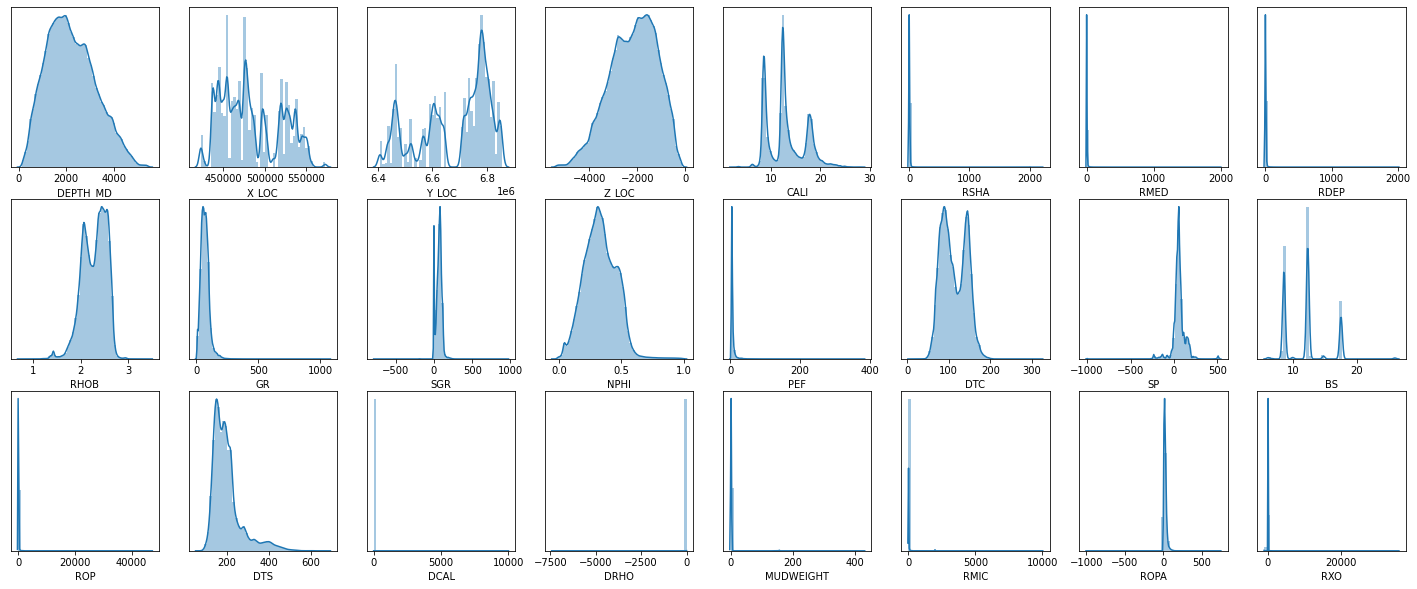

In [9]:
distr_plotter(data,numeric=True)

In [10]:
data['RSHA'] = np.log10(data['RSHA'])
data['RMED'] = np.log10(data['RMED'])
data['RDEP'] = np.log10(data['RDEP'])
data['RMIC'] = np.log10(data['RMIC'])
data['RXO'] = np.log10(data['RXO'])

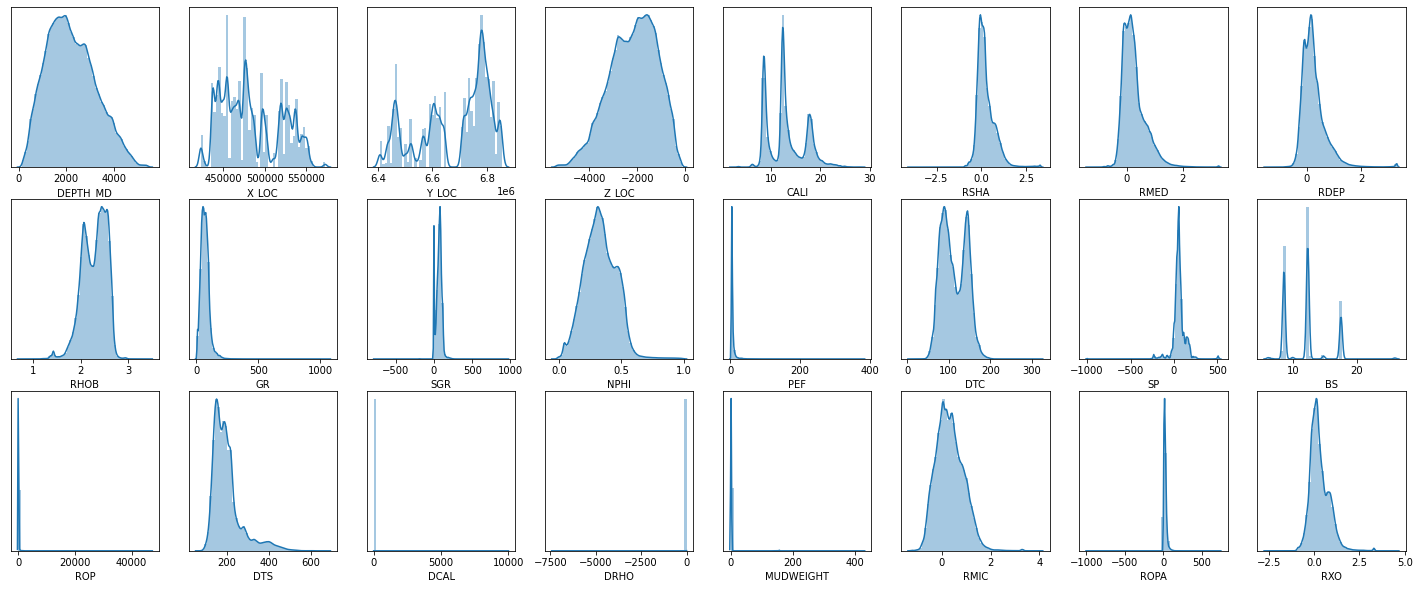

In [11]:
distr_plotter(data,numeric=True)

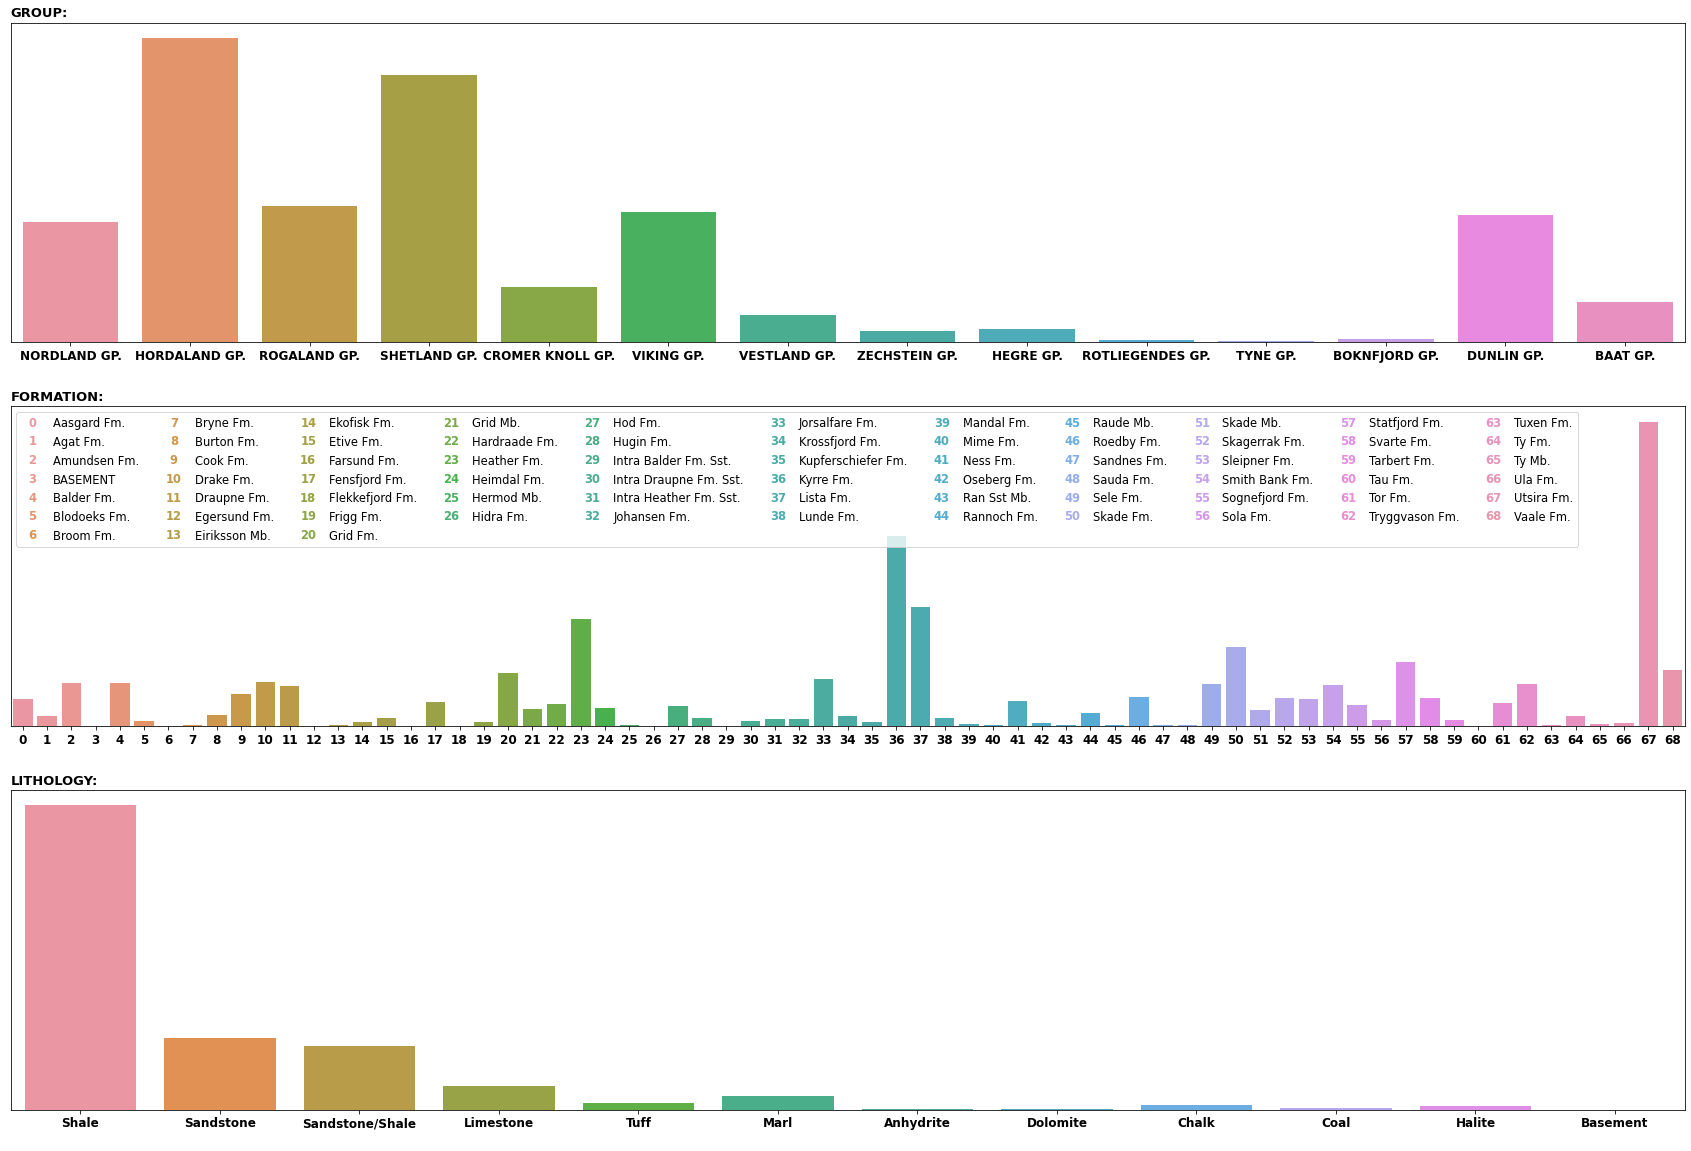

In [12]:
distr_plotter(data,categorical=True)

## 3.2 Well Visualization

In [13]:
from e_functions import skylog

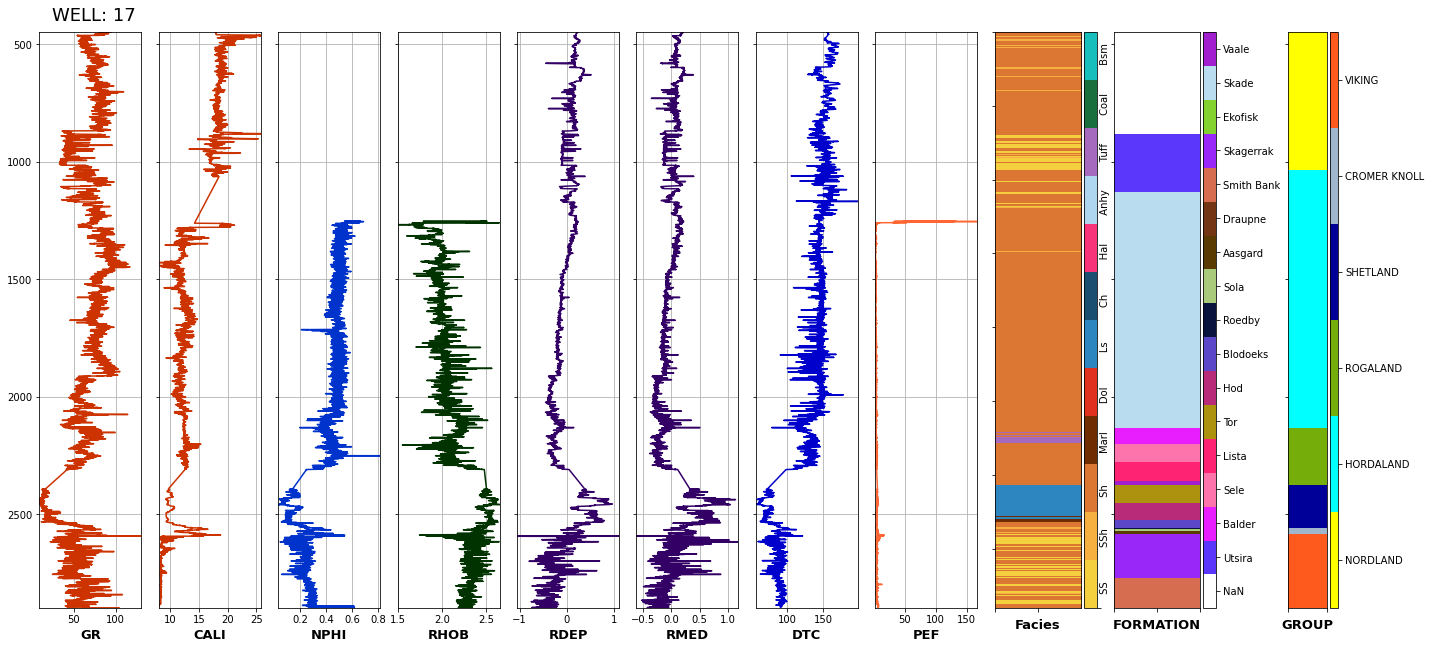

In [14]:
skylog(data).draw(17, ['GR','CALI','NPHI','RHOB','RDEP','RMED','DTC','PEF','Facies','FORMATION','GROUP'])

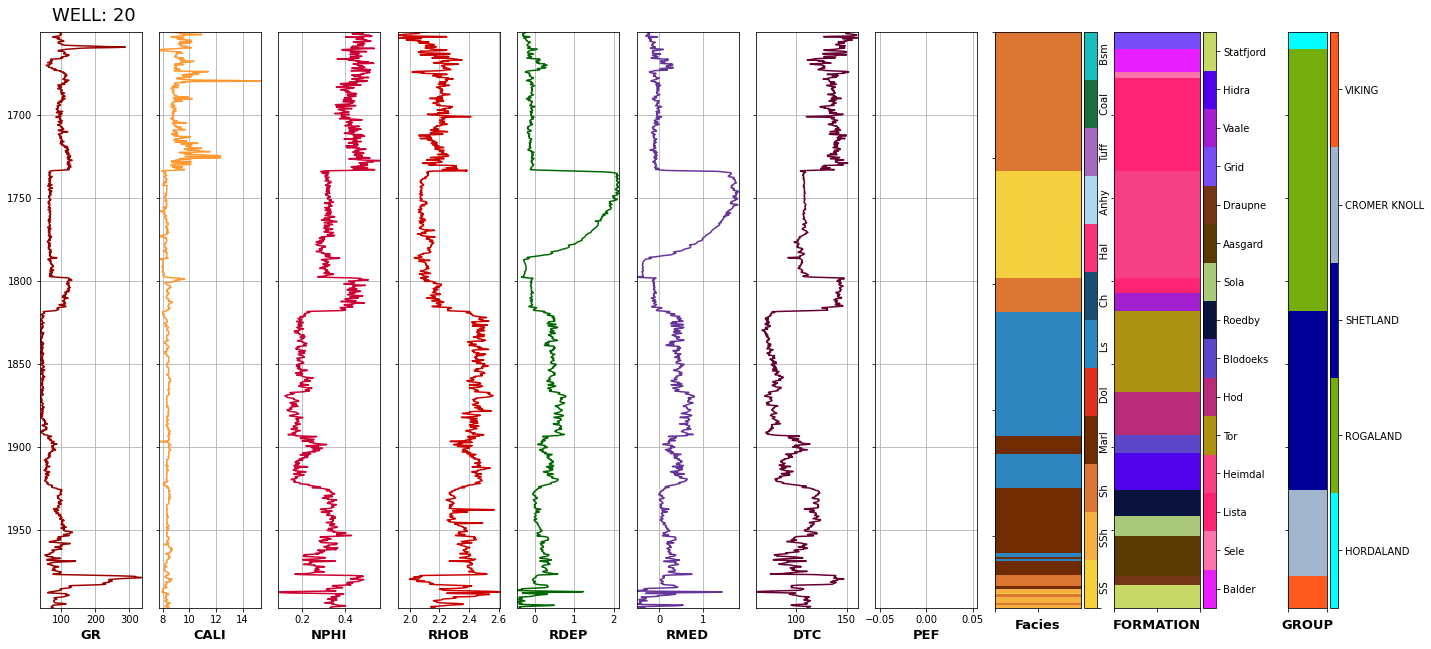

In [15]:
skylog(data).draw(20, ['GR','CALI','NPHI','RHOB','RDEP','RMED','DTC','PEF','Facies','FORMATION','GROUP'])

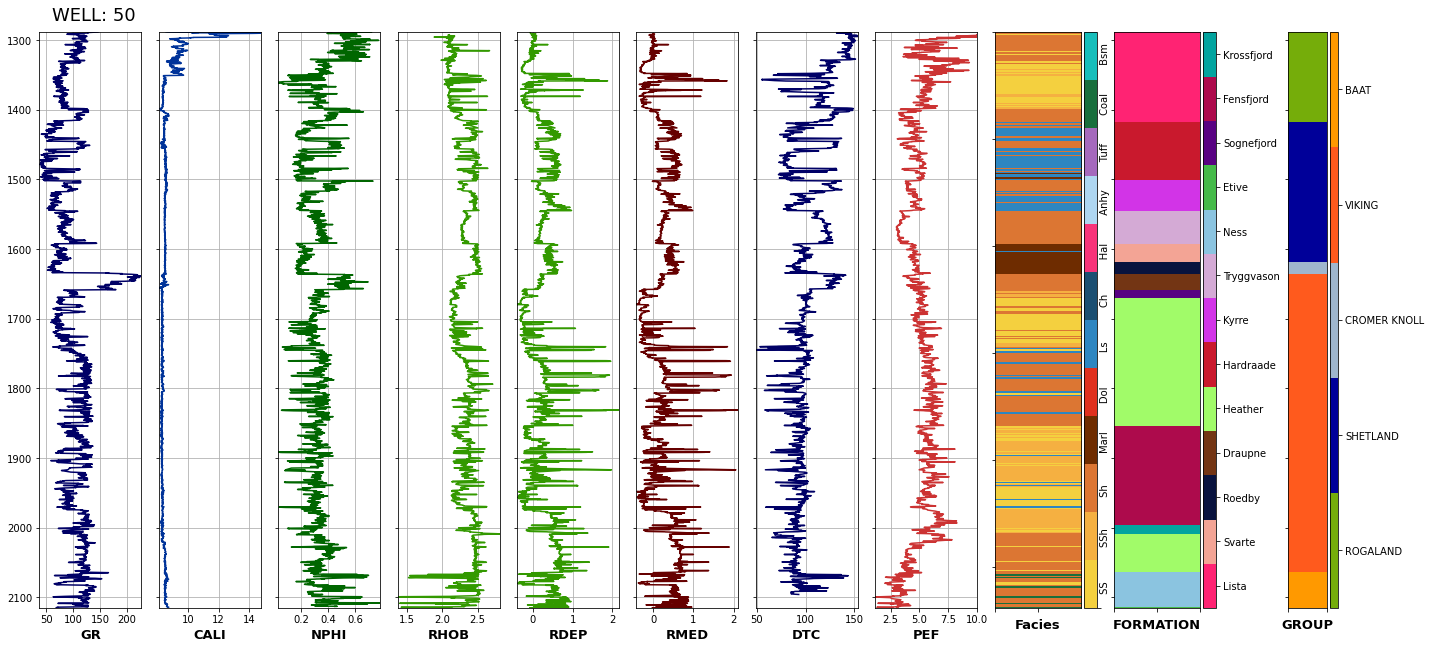

In [16]:
skylog(data).draw(50, ['GR','CALI','NPHI','RHOB','RDEP','RMED','DTC','PEF','Facies','FORMATION','GROUP'])

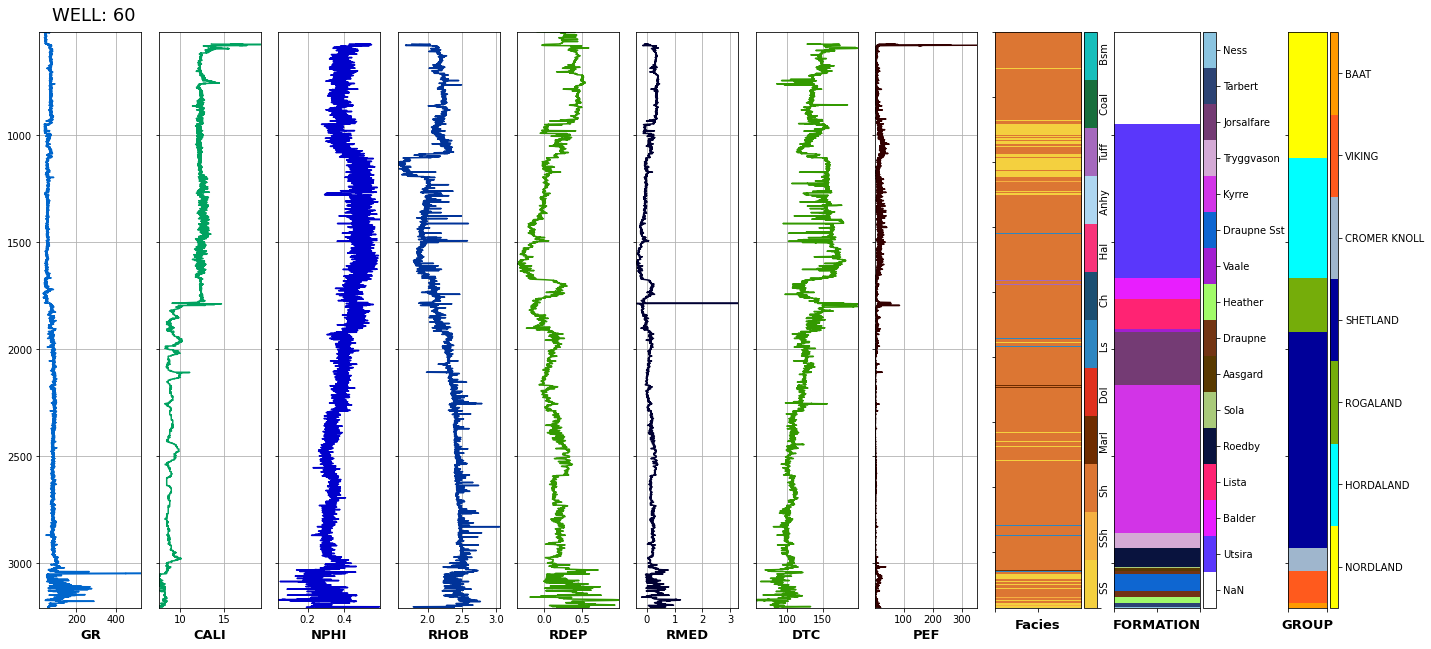

In [17]:
skylog(data).draw(60, ['GR','CALI','NPHI','RHOB','RDEP','RMED','DTC','PEF','Facies','FORMATION','GROUP'])

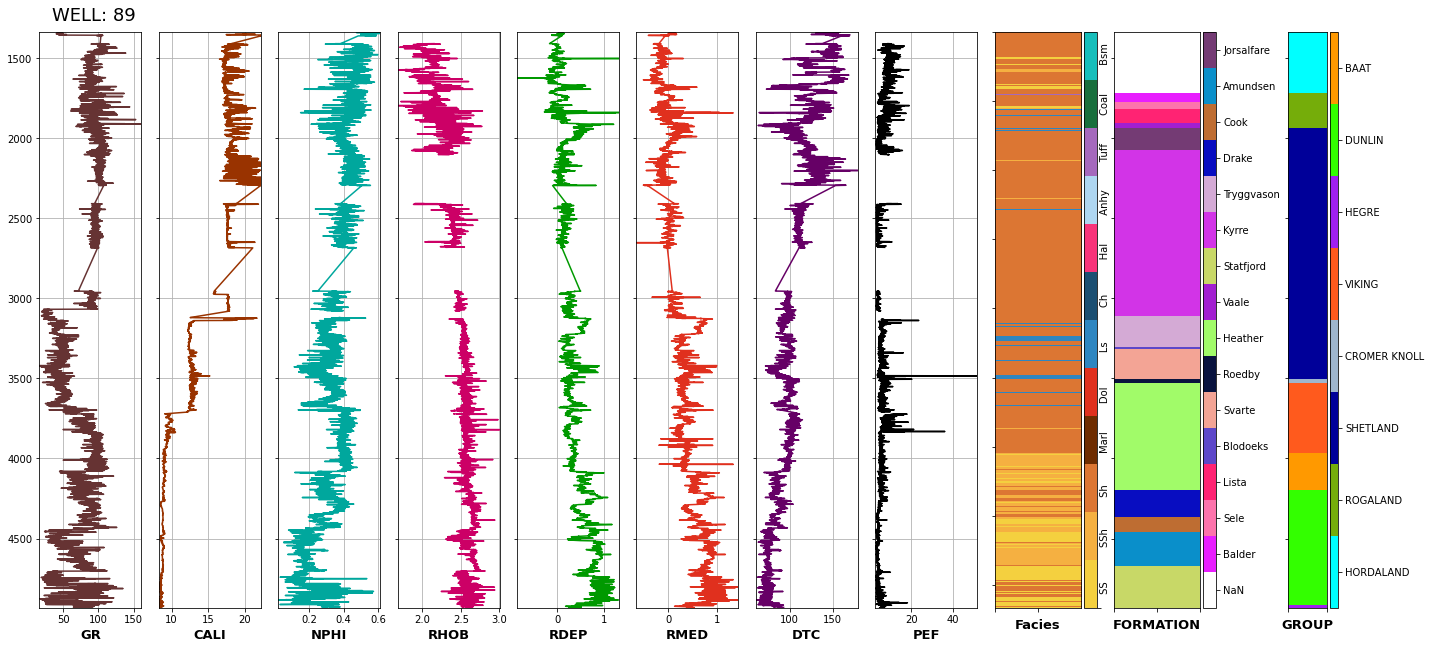

In [18]:
skylog(data).draw(89, ['GR','CALI','NPHI','RHOB','RDEP','RMED','DTC','PEF','Facies','FORMATION','GROUP'])

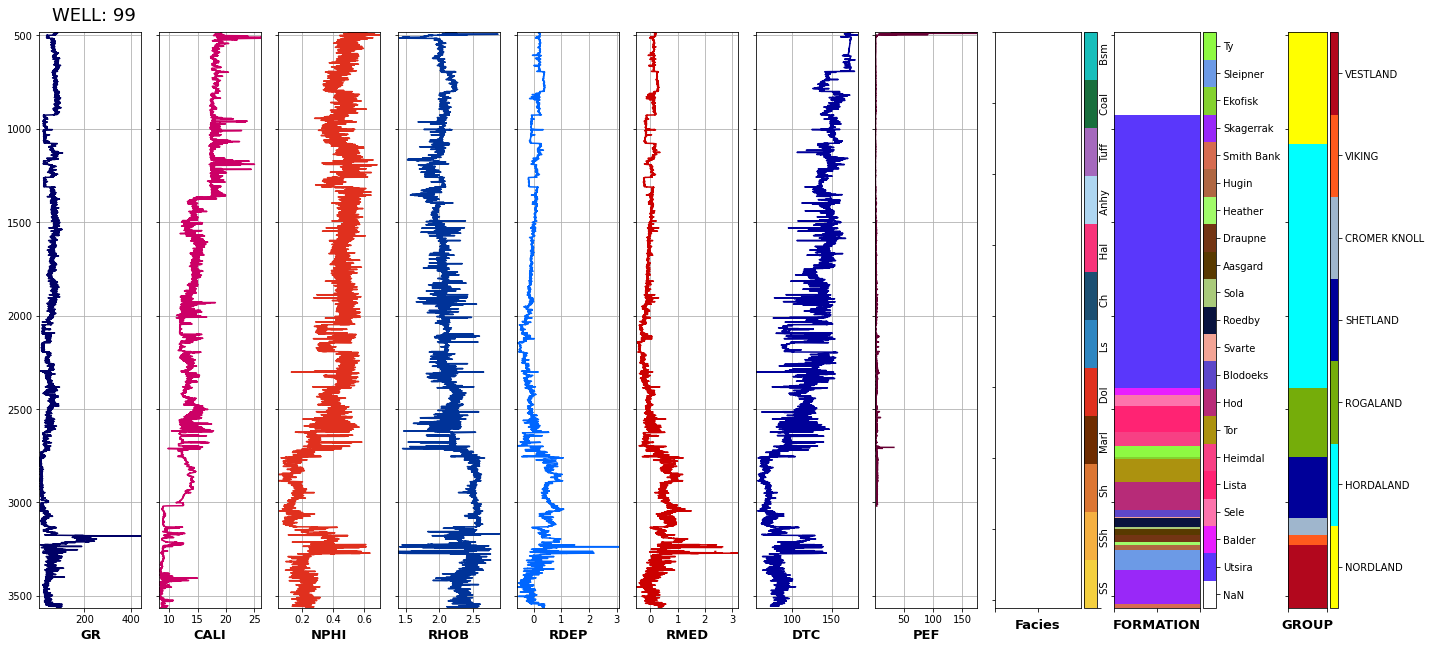

In [19]:
# Plot Test data
skylog(data).draw(99, ['GR','CALI','NPHI','RHOB','RDEP','RMED','DTC','PEF','Facies','FORMATION','GROUP'])

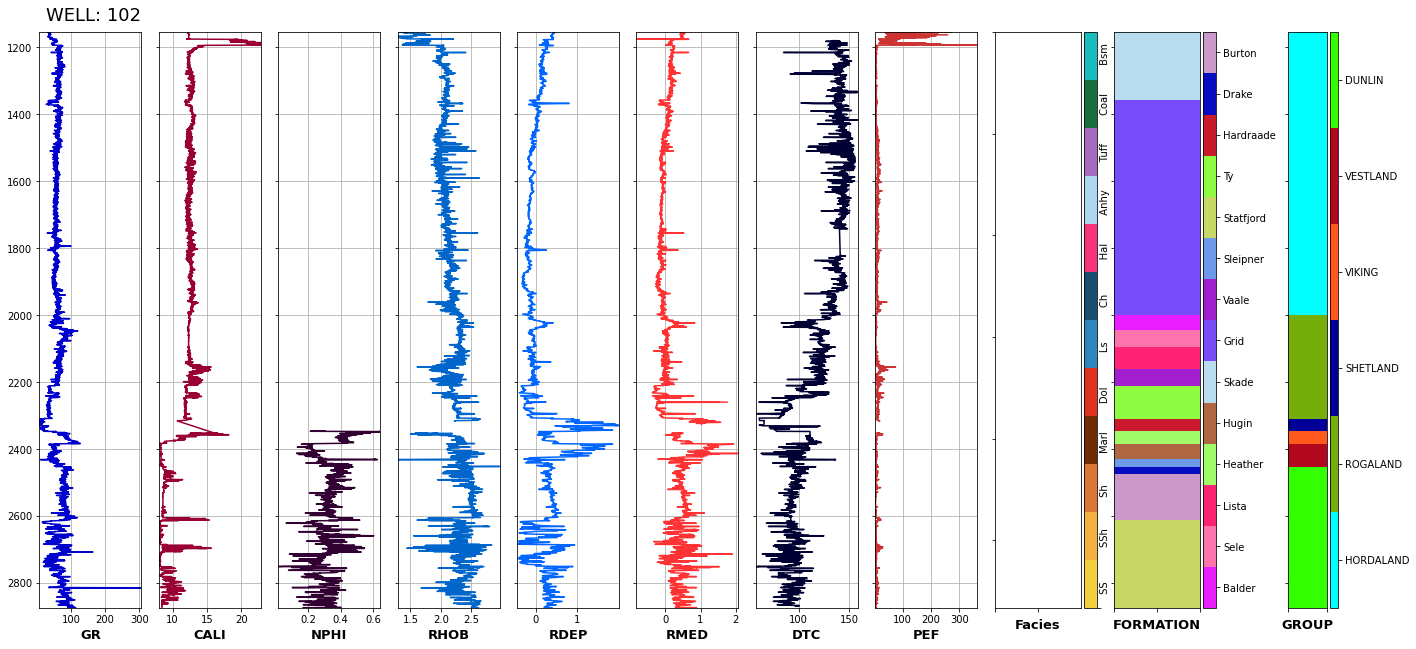

In [20]:
skylog(data).draw(102, ['GR','CALI','NPHI','RHOB','RDEP','RMED','DTC','PEF','Facies','FORMATION','GROUP'])

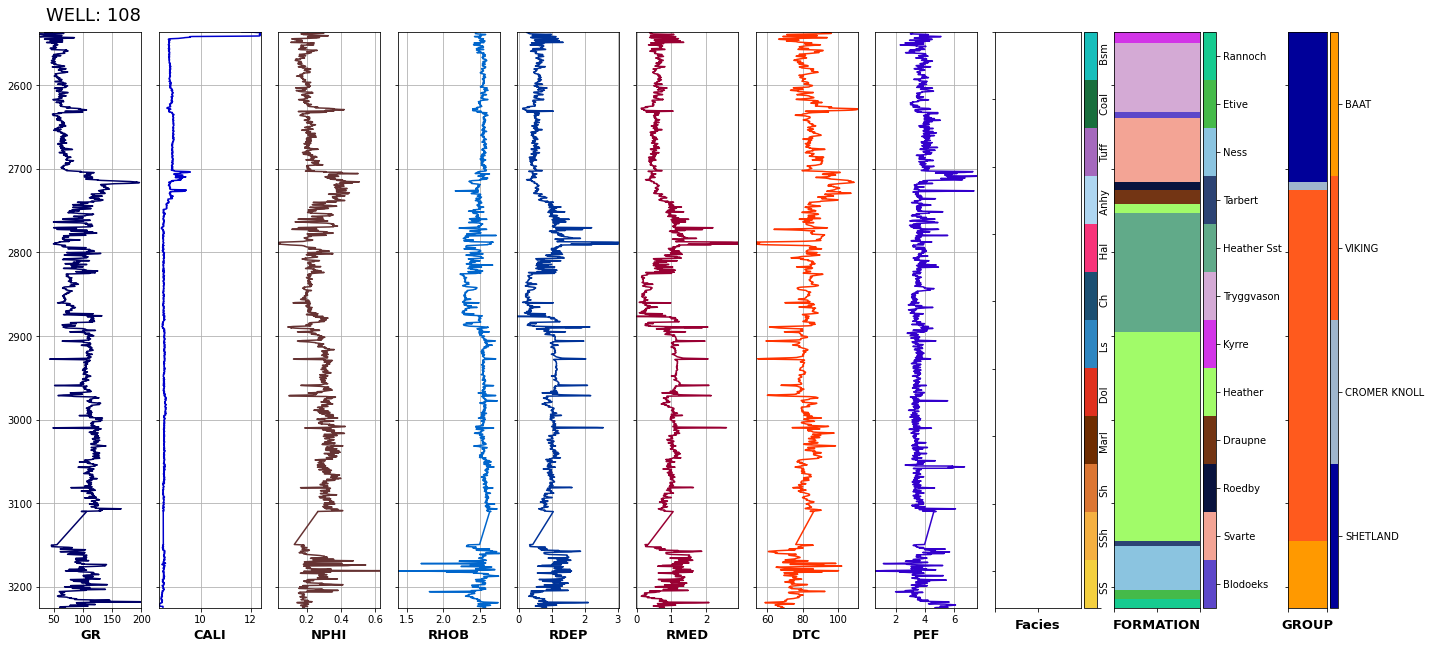

In [21]:
skylog(data).draw(108, ['GR','CALI','NPHI','RHOB','RDEP','RMED','DTC','PEF','Facies','FORMATION','GROUP'])

## 3.3 Missing Data

In [ ]:
nulls = data.isna().sum()
percentage = [np.round(100*i/len(data),2) for i in nulls]
pd.DataFrame.from_dict([data.columns.values,percentage]).T.rename(columns={0:'Feature',1:'%NaN'}).sort_values(by='%NaN')

,Feature,%NaN
0,WELL,0
1,DEPTH_MD,0
12,GR,0
5,GROUP,0.1
2,X_LOC,0.83
3,Y_LOC,0.83
4,Z_LOC,0.83
10,RDEP,0.85
9,RMED,3.03
16,DTC,6.25


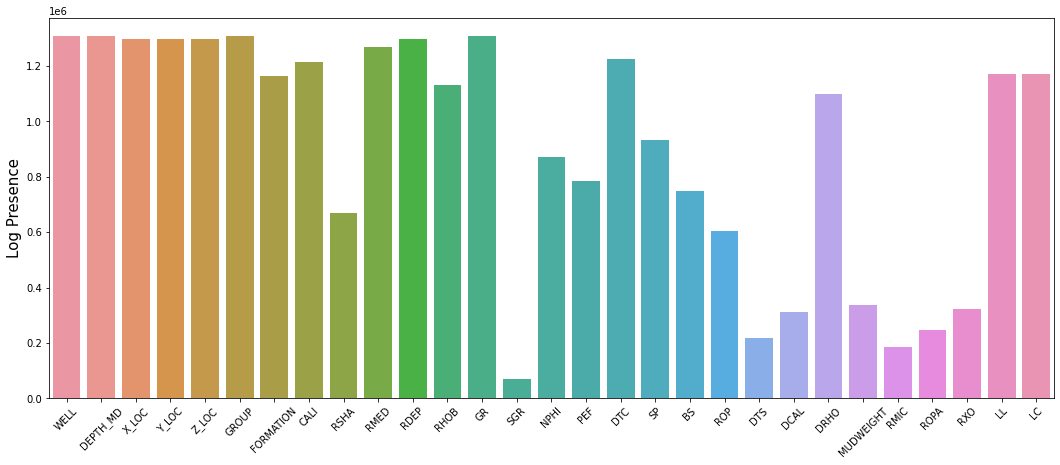

In [ ]:
#------------------------------- Well Presence --------------------------------#
def missings(data):

  data_count = data.count()
  fig, ax = plt.subplots(1, 1, figsize=(18, 7))
  ax = sns.barplot(x= data_count.index, y = data_count)
  ax.set_xticklabels(data_count.index, rotation=45) 
  ax.set_ylabel('Log Presence', fontdict={'fontsize':15});

missings(data)  

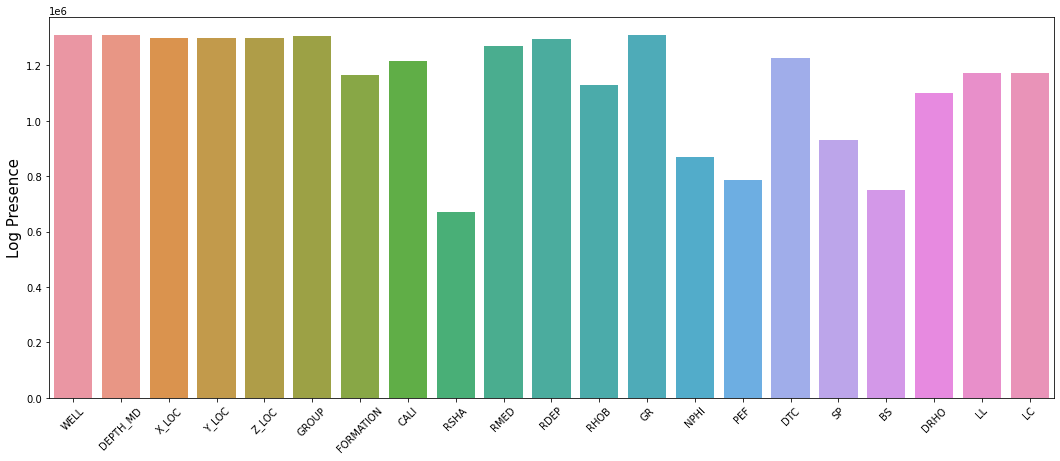

In [ ]:
#------------------------ Drop Useless Curves ----------------------------#
nulls = data.isna().sum().sort_values()
to_drop = []
for i in range(len(data.keys())):
  if (nulls[i]/len(data)) > 0.5:
    to_drop.append(nulls.index[i])

data = data.drop(to_drop,axis=1)

missings(data)

##3.3 Parameter Correlation

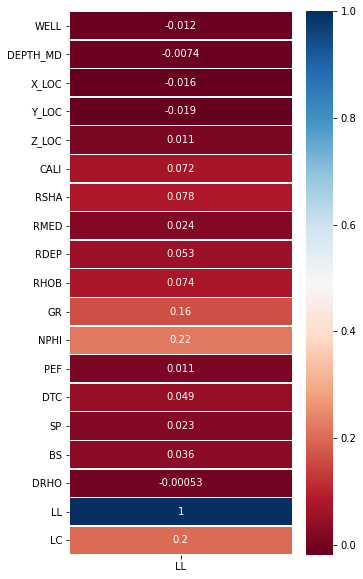

In [ ]:
def show_correlation(data,target):
  plt.figure(figsize=(5,10))
  sns.heatmap(pd.DataFrame(data.corr()[target]), annot=True,linewidth=0.5,cmap="RdBu");

show_correlation(data,'LL') 

##3.4 Outliers

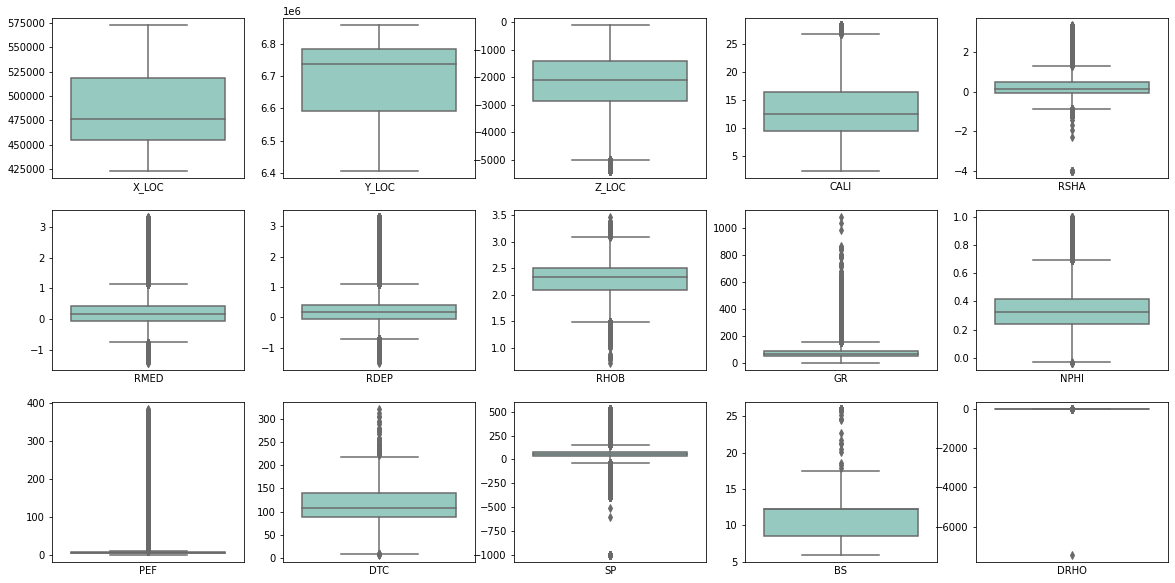

In [ ]:
def show_outliers(df, params):
  fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
  axs = axs.ravel()

  for ax, i in zip(axs, params):
    ax = sns.boxplot(data=df[i],palette="Set3", ax=ax);
    ax.set_xticks([])
    ax.set_xlabel(i)

show_outliers(data,data.keys().drop(['WELL','LL','LC','FORMATION','GROUP','DEPTH_MD']))

In [ ]:
def outlier_replacer(df,params,n_std):  
  #The original code of this function was written by Daniel Romero, refer to: https://www.linkedin.com/in/jdromerom/
  remove = df[params]
  for i in remove.keys():

    min,max = remove[i].mean()-(n_std*remove[i].std()),remove[i].mean()+(n_std*remove[i].std())

    min_idx = list(remove.loc[remove[i]<=min].index.values)
    max_idx = list(remove.loc[remove[i]>=max].index.values)

    remove.at[min_idx,i] = min
    remove.at[max_idx,i] = max

    df[i] = remove[i]

  return df

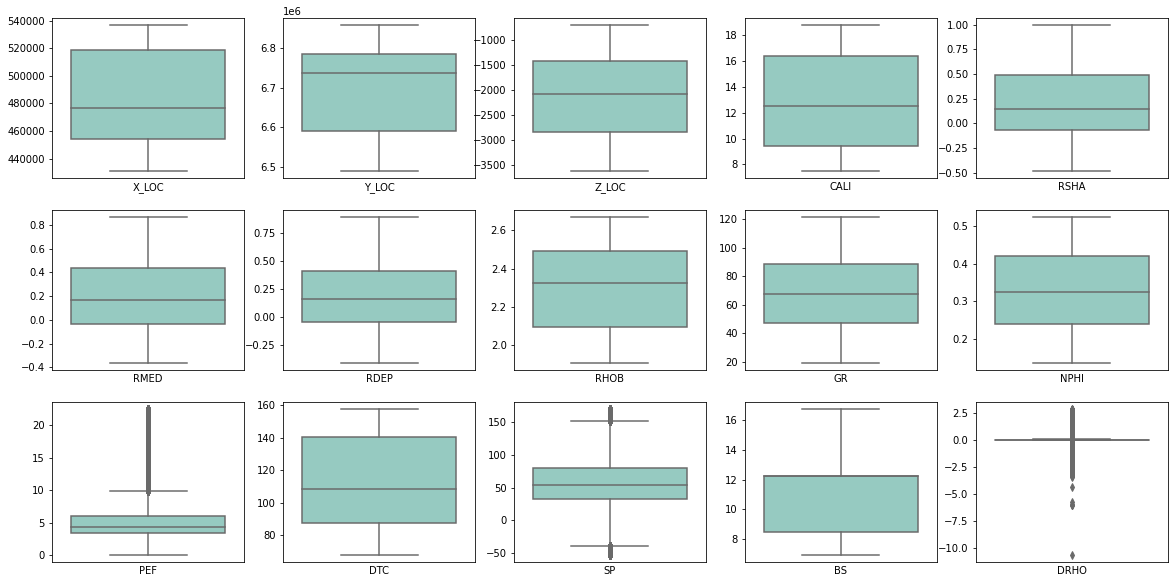

In [ ]:
data = outlier_replacer(data,data.keys().drop(['WELL','LL','LC','FORMATION','GROUP','DEPTH_MD']),1.5)
show_outliers(data,data.keys().drop(['WELL','LL','LC','FORMATION','GROUP','DEPTH_MD'])) 

# 5. NaN Imputation

In [ ]:
del data['DRHO']

In [ ]:
for i in data.keys():
  data[i].fillna(-999.99,inplace=True)

data.isna().sum()

WELL         0
DEPTH_MD     0
X_LOC        0
Y_LOC        0
Z_LOC        0
GROUP        0
FORMATION    0
CALI         0
RSHA         0
RMED         0
RDEP         0
RHOB         0
GR           0
NPHI         0
PEF          0
DTC          0
SP           0
BS           0
LL           0
LC           0
dtype: int64

#6. Model Building

This 3 models takes more than 2 hours to run, you may want to focus on the best one if you decide to keep trying on it, or you can try with any other model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
y_true = pd.read_csv('y_test.csv',sep=';').rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY': 'LL'})
y_true = y_true['LL'].values

In [ ]:
# Define Classifiers & Parameters
knn = KNeighborsClassifier(leaf_size = 20, n_neighbors=3,)
rf = RandomForestClassifier(criterion='entropy', n_estimators=250)
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=150)

In [ ]:
# Take Categorical Data to Numerical 

data['GROUP_encoded'] = data['GROUP'].astype('category')
data['GROUP_encoded'] = data['GROUP_encoded'].cat.codes 
data['FORMATION_encoded'] = data['FORMATION'].astype('category')
data['FORMATION_encoded'] = data['FORMATION_encoded'].cat.codes

# Replace Lithology Values
lithology_numbers = {30000: 0,65030: 1,65000: 2,80000: 3,74000: 4,70000: 5,70032: 6,88000: 7,86000: 8,99000: 9,90000: 10,93000: 11}
data['LL'] = data['LL'].replace(lithology_numbers)

# Split Data
X_train = data.loc[0:len(train)-1,data.keys().drop(['WELL','LC','FORMATION','GROUP','LL'])]
y_train = data.loc[0:len(train)-1,'LL'].values.reshape(-1,1)
X_test = data.loc[len(train):,data.keys().drop(['WELL','LC','FORMATION','GROUP','LL'])]

In [ ]:
litho_dict = {0:30000,1:65030,2:65000,3:80000,4:74000,5:70000,6:70032,7:88000,8:86000,9:99000,10:90000,11:93000}

knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = (accuracy_score(y_true, pd.DataFrame(y_pred_knn).replace(litho_dict).iloc[:,0].values))
print('KNN: ',acc_knn)

rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = (accuracy_score(y_true, pd.DataFrame(y_pred_rf).replace(litho_dict).iloc[:,0].values))
print('RF: ',acc_rf)

gbc.fit(X_train,y_train)
y_pred_gbc = gbc.predict(X_test)
acc_gbc = (accuracy_score(y_true, pd.DataFrame(y_pred_gbc).replace(litho_dict).iloc[:,0].values))
print('GB: ',acc_gbc)

KNN:  0.5713377099995613
RF:  0.7929978214144723
GB:  0.7920328103753308


## Error Metrics for Classification

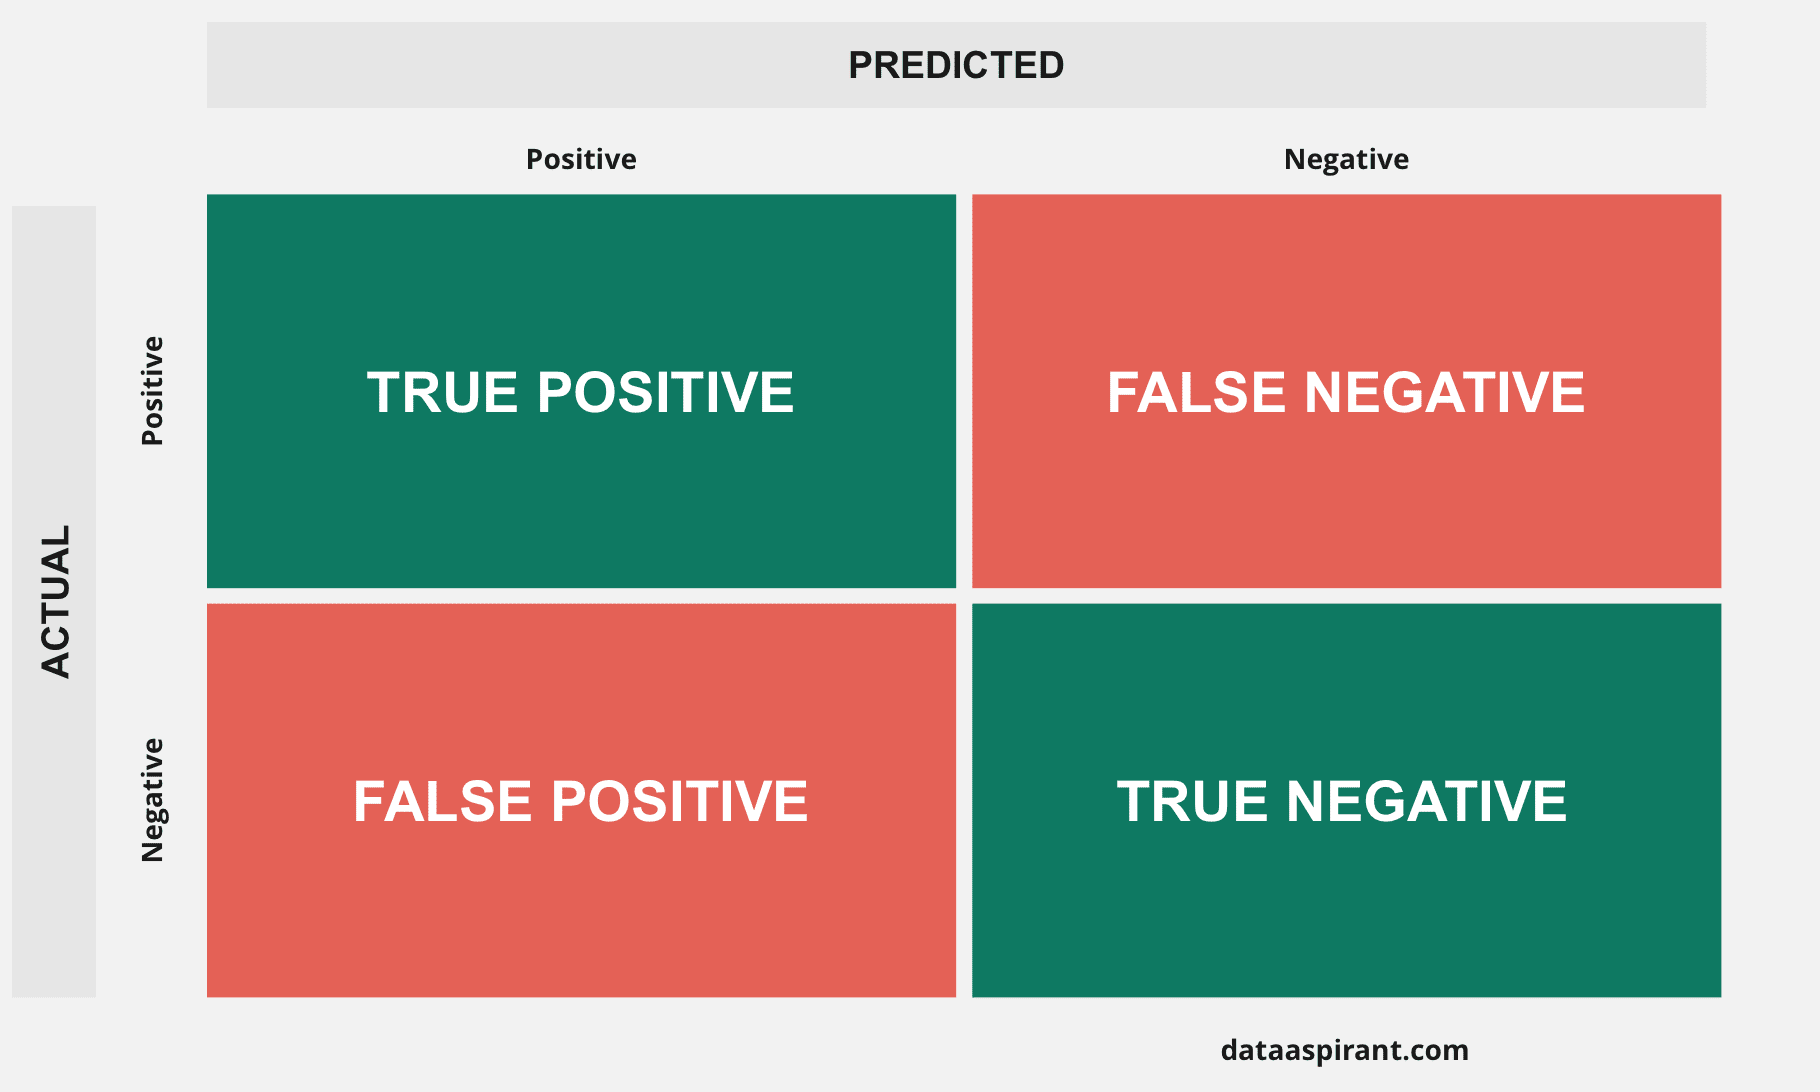

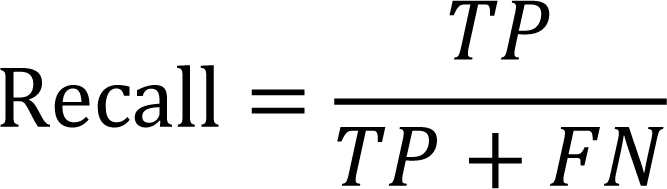

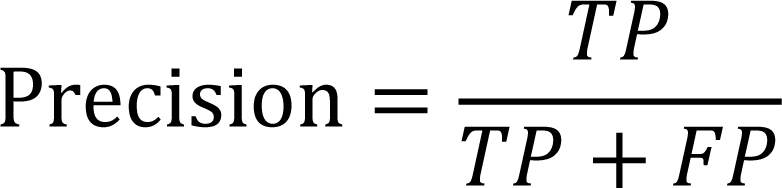

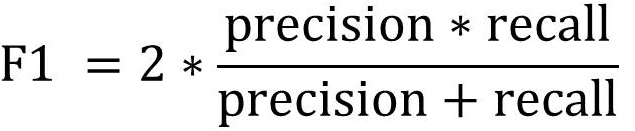

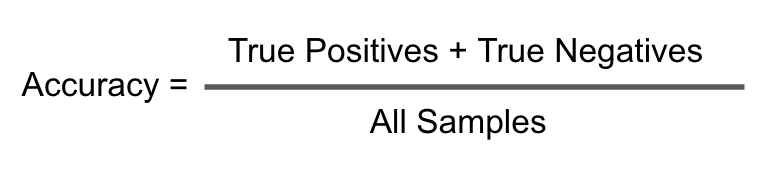

<h1>Random Forest

In [ ]:
dic_litho = {30000: 'Sandstone',65000: 'Shale', 65030: 'Sandstone/Shale', 70000: 'Limestone', 70032: 'Chalk', 74000: 'Dolomite', 80000: 'Marl',
             86000: 'Anhydrite', 88000: 'Halite', 90000: 'Coal', 93000: 'Basement', 99000: 'Tuff'}

y_actual = pd.DataFrame(y_true).replace(dic_litho)

y_predicted = pd.DataFrame(y_pred_rf).replace(litho_dict)
y_predicted  = y_predicted.replace(dic_litho)

In [ ]:
print(len(y_actual.iloc[:,0].unique()),' True Lithologies:')
print(y_actual.iloc[:,0].unique())

10  True Lithologies:
['Shale' 'Sandstone' 'Sandstone/Shale' 'Limestone' 'Tuff' 'Marl' 'Chalk'
 'Coal' 'Anhydrite' 'Dolomite']


In [ ]:
print(len(y_predicted.iloc[:,0].unique()),' Predicted Lithologies:')
print(y_predicted.iloc[:,0].unique())

9  Predicted Lithologies:
['Shale' 'Sandstone' 'Sandstone/Shale' 'Limestone' 'Tuff' 'Marl' 'Coal'
 'Chalk' 'Anhydrite']


In [ ]:
print('Accuracy: ',accuracy_score(y_actual,y_predicted).round(4))
print(classification_report(y_actual,y_predicted))

Accuracy:  0.793
                 precision    recall  f1-score   support

      Anhydrite       1.00      0.14      0.25       125
          Chalk       0.00      0.00      0.00       625
           Coal       0.71      0.57      0.64       690
       Dolomite       0.00      0.00      0.00       416
      Limestone       0.41      0.55      0.47      4798
           Marl       0.25      0.02      0.03      3306
      Sandstone       0.80      0.85      0.82     24048
Sandstone/Shale       0.59      0.30      0.40     17558
          Shale       0.84      0.94      0.89     83975
           Tuff       0.72      0.44      0.55      1245

       accuracy                           0.79    136786
      macro avg       0.53      0.38      0.41    136786
   weighted avg       0.76      0.79      0.77    136786



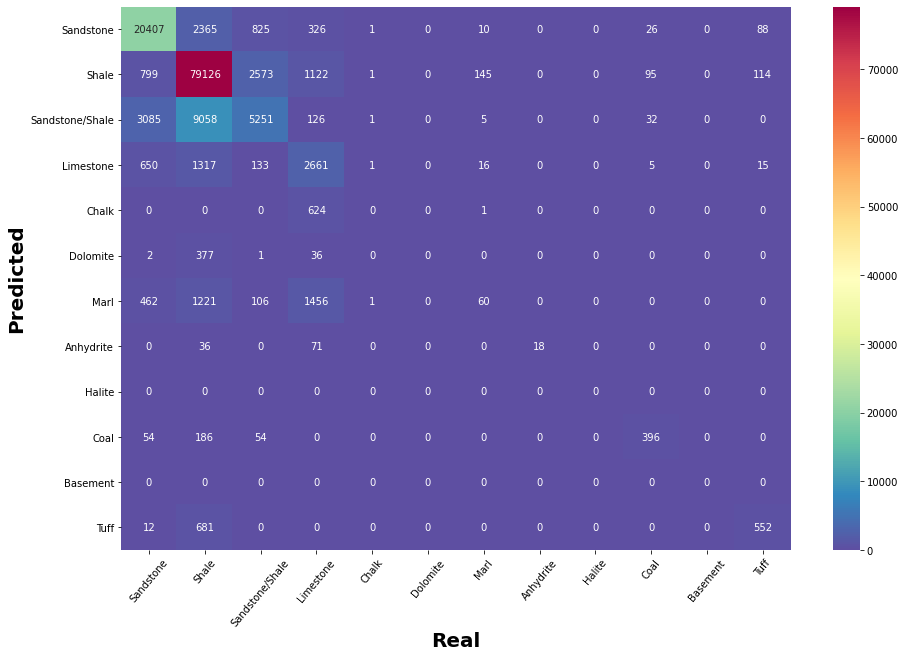

In [ ]:
from sklearn.metrics import confusion_matrix


labels = list(dic_litho.values())
plt.subplots(figsize=(15,10))

cm = confusion_matrix(y_actual,y_predicted,labels)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Spectral_r')

plt.ylabel('Predicted',fontdict={'fontsize':20,'fontweight':'bold'})
plt.xticks(rotation=50)
plt.xlabel('Real',fontdict={'fontsize':20,'fontweight':'bold'});

# 7. Conclusions

In [ ]:
"""
1.- For this simple workflow RF had the best performance however the accuracy score isn't good enough yet.
2.- Feature Engineering, Hyperparameter Tuning and another Missing Value Imputation method may be considered for improving accuracy.
3.- The model is misspredicting the minority classes, so class imbalance may be also another issue to be considered.
4.- Notice that if you want to try more than 1 "strong" model in the same workspace, colab may not be able handle them,
    therefore you can try with another cloud server like IBM Watson Studio or Amazon Sagamaker.
"""

# If you have any question, refer to:

# https://github.com/stratga/e-challenge_ml
# f.gallo.cruz@gmail.com 
# e-challenge@spe-ecuador.org

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>